In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [3]:
#loading data from csv file to pandas database
calories_data=pd.read_csv('calories.csv')

In [4]:
exercise_data=pd.read_csv('exercise.csv')

In [5]:
#combining the two dataframes
calories_data=pd.concat([exercise_data,calories_data["Calories"]],axis=1)
calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [6]:
#checking the number of rows and columns
calories_data.shape

(15000, 9)

In [7]:
#getting some information about the data
calories_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [8]:
#checking for missing values
calories_data.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [9]:
#Data Analysis
#get some statistical measures about the data
calories_data.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [10]:
#Data Visualization
sns.set()

<Axes: xlabel='count', ylabel='Gender'>

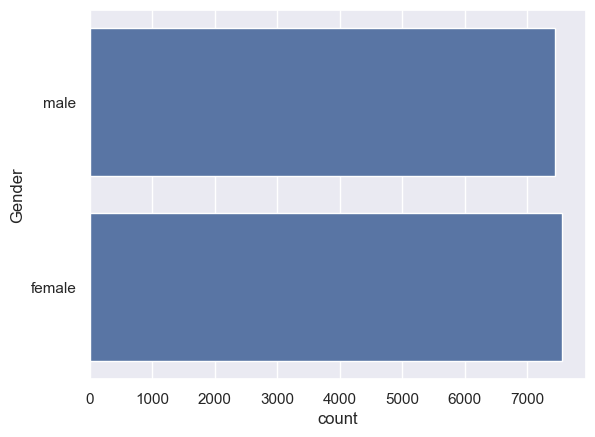

In [11]:
#plotting the gender column in count plot
sns.countplot(calories_data["Gender"])

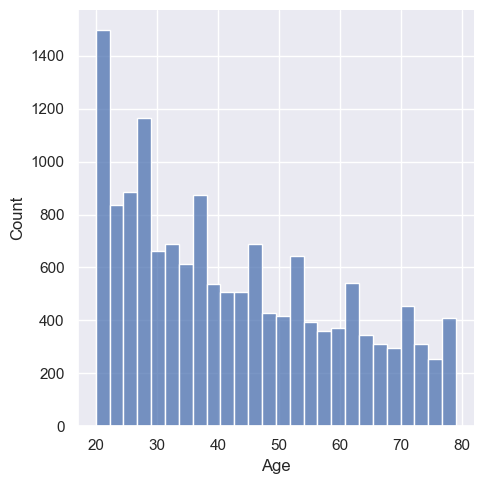

In [12]:
#finding the distribution of "age" column
sns.displot(calories_data["Age"])

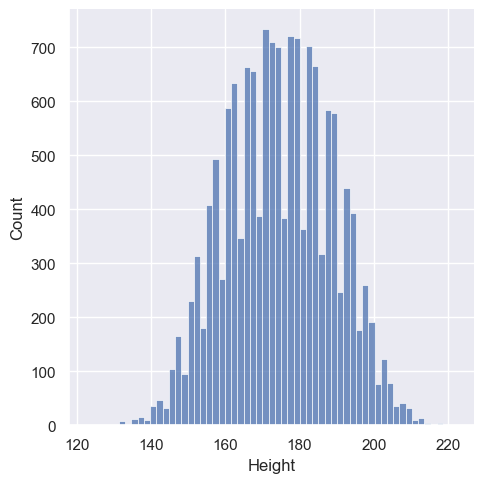

In [13]:
#finding the distribution of "height" column
sns.displot(calories_data["Height"])

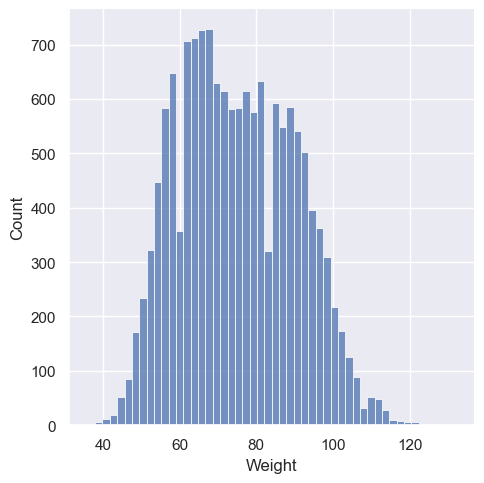

In [14]:
#finding the distribution of "weight" column
sns.displot(calories_data["Weight"])

In [15]:
#Finding the correlation in the dataset
#1.Positive correlation
#2.Negative correlation
correlation = calories_data.corr(method='pearson', min_periods=1, numeric_only=True)

<Axes: >

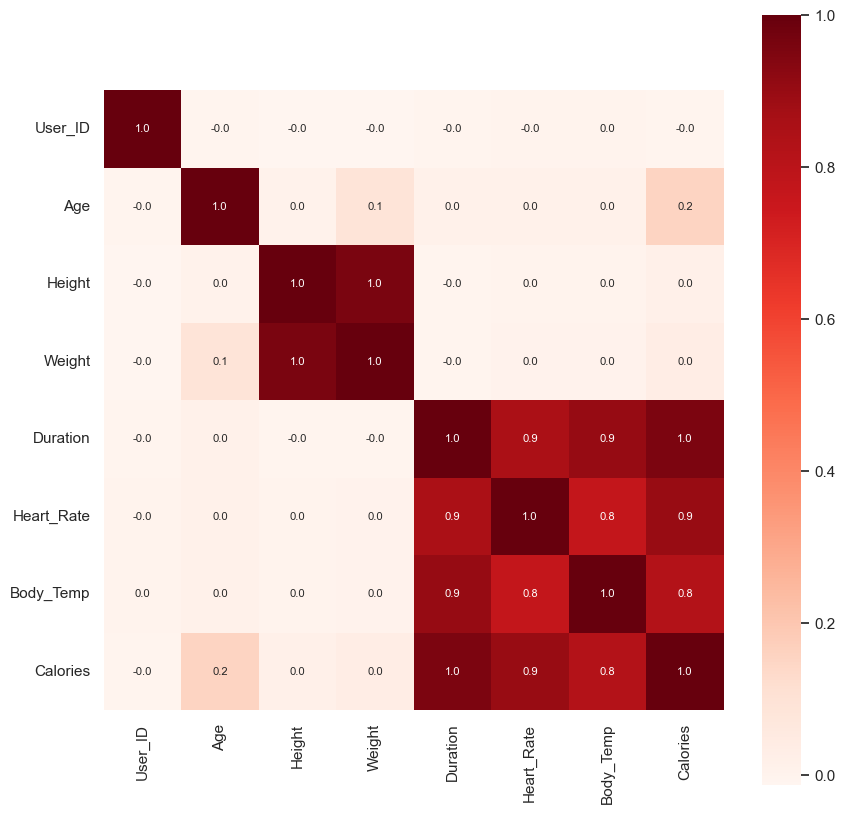

In [16]:
#constructing a heaatmap to understand the correlation
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt=".1f", annot=True, annot_kws={"size":8}, cmap="Reds")

In [17]:
#converting text data to numerical values
calories_data.replace({"Gender":{'male':0,'female':1}},inplace=True)

C:\Users\arush\AppData\Local\Temp\ipykernel_5464\3503193073.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  calories_data.replace({"Gender":{'male':0,'female':1}},inplace=True)


In [18]:
#separating features and target
x=calories_data.drop(columns=['User_ID','Calories'],axis=1)
y=calories_data['Calories']

In [19]:
print(x)

       Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0           0   68   190.0    94.0      29.0       105.0       40.8
1           1   20   166.0    60.0      14.0        94.0       40.3
2           0   69   179.0    79.0       5.0        88.0       38.7
3           1   34   179.0    71.0      13.0       100.0       40.5
4           1   27   154.0    58.0      10.0        81.0       39.8
...       ...  ...     ...     ...       ...         ...        ...
14995       1   20   193.0    86.0      11.0        92.0       40.4
14996       1   27   165.0    65.0       6.0        85.0       39.2
14997       1   43   159.0    58.0      16.0        90.0       40.1
14998       0   78   193.0    97.0       2.0        84.0       38.3
14999       0   63   173.0    79.0      18.0        92.0       40.5

[15000 rows x 7 columns]


In [20]:
print(y)

0        231.0
1         66.0
2         26.0
3         71.0
4         35.0
         ...  
14995     45.0
14996     23.0
14997     75.0
14998     11.0
14999     98.0
Name: Calories, Length: 15000, dtype: float64


In [21]:
#splitting the data into training and test data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [22]:
print(x.shape,x_train.shape,x_test.shape)

(15000, 7) (12000, 7) (3000, 7)


In [40]:
#Model Training
#loading the model
model= XGBRegressor()

In [41]:
#training the model with x_train
model.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [42]:
#prediction on test data
test_data_prediction=model.predict(x_test)

In [26]:
print(test_data_prediction)

[125.58828  222.11377   38.725952 ... 144.3179    23.425894  90.100494]


In [27]:
#mean absolute error
mae=metrics.mean_absolute_error(y_test,test_data_prediction)

In [28]:
print("Mean Absolute Error:",mae)

Mean Absolute Error: 1.4833678883314132


In [48]:
print(x_test.shape)

(3000, 7)


In [66]:
print("Calories_Burnt_Predictor")
print("Enter your deatails")
gender=input("Gender(male/female):")
age=int(input("Age: "))
height=float(input("Height(in cm): "))
weight=float(input("Weight: "))
dur=float(input("Duration(in min): "))
heart_rate=float(input("Heart Rate: "))
body_t=float(input("Body Temperature(in celcius): "))
if gender=="male":
    gender=int(0)
elif gender=="female":
    gender=int(1)
list=[gender,age,height,weight,dur,heart_rate,body_t]
input_array= np.array(list).reshape(1, -1)
prediction=model.predict(input_array)
print("Calories burnt will be: ",prediction)

Calories_Burnt_Predictor


Gender(male/female): male
Age:  68
Height(in cm):  190
Weight:  94
Duration(in min):  29
Heart Rate:  105
Body Temperature(in celcius):  40.8


Calories burnt will be:  [236.13371]
